<a href="https://colab.research.google.com/github/MRamsey28/Astro1221/blob/main/calculating_Hubble_constant_using_Type_1a_SupernovaeMaggie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #importing packages necessary to complete the code
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [3]:
from google.colab import files #importing the file we need to download and plot the data we will be using
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [4]:
dat = astropy.io.ascii.read("Tonry_2003.vot") #defining the data in the document we downloaded
print(dat) #printing to see what the data is

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


  col1     col2    col3   col4    col5    col6  col7  col8  col9  col10    col11  
-------- ------- ------- ------ -------- ----- ----- ----- ----- -------- --------
 SN1972E  314.84   30.08 0.0023    N5253    16 2.839 2.399 0.033 204.9697 -31.6692
 SN1980N 240.161 -56.689 0.0056    N1316     9 3.225  3.14 0.043  50.6753 -37.2074
 SN1981B  292.97  64.743 0.0072    N4536     2 3.334 3.077 0.041 188.6233   2.1995
 SN1981D 240.161 -56.689 0.0056    N1316     9 3.225 3.044 0.055  50.6753 -37.2074
 SN1986G 309.543  19.401 0.0027    N5128    26 2.908  2.44 0.035 201.4028 -43.0316
 SN1988U   8.737 -81.227   0.31     Anon    24 4.968 5.096 0.072   3.5756 -30.4164
 SN1989B 241.991  64.403 0.0036    N3627    37 3.033 2.844  0.03 170.0578  12.9718
 SN1990N 294.369  75.987 0.0044    N4639    21  3.12 3.204 0.035 190.7367  13.2566
 SN1990O  37.654   28.36 0.0307 M+034403    10 3.964 3.977 0.025 258.8999  16.3241
 SN1990T 341.503 -31.526   0.04   P63925    10 4.079 4.101 0.042 299.7601 -56.2583
    

In [5]:
distance = 10**dat["col8"] / 72.0 * u.mpc #taking the information from the the log(d*Ho) (col8) to find the distance in mpc. first, take it out of log for with  10**, then divide it by 72 (huble constant)
velocity = 10**dat["col7"] * u.km / u.s #putting the receding velocity from the log form (col7) to the 10 to take it out of log form

Text(0, 0.5, 'Velocity [km/s]')

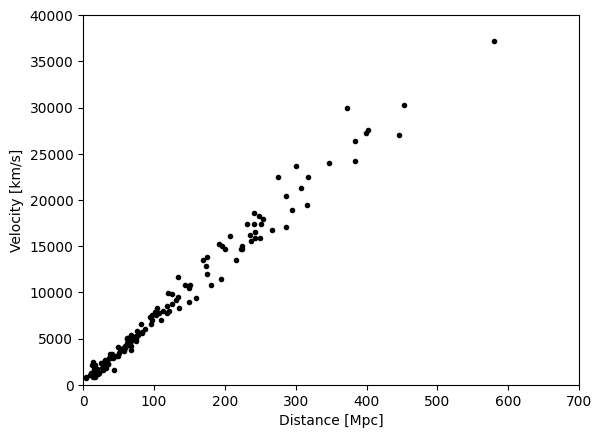

In [6]:
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") #plotting the velocity over the distance
plt.xlim(0, 700) #limiting the data so we only have distance values from 0-700. This only uses a more "local" portion of the univese. Using further out values would result in a different slope, indicating the existance of cosmic acceleration.
plt.ylim(0, 4e4) #limiting the data so we only have velocities between 0-4e4. Same reason as above.
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [7]:
x = distance.to(u.mpc).value #redefining the distance to make it shorter
ind = np.where((x > 0) & (x < 700)) #setting perameters for what distance values the data should be between
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) #calculating the line of best fit for our velocity vs time graph within the parameters we have set
print ("Slope: Age of the Universe = ", z ) #visualizing this value. it is not in polynomial form, so we must next convert it so it can be graphed

Slope: Age of the Universe =  [ 67.48137251 355.24954906]


In [8]:
p = np.poly1d(z) #turns our values into a polynomial, where before it was just 2 numbers
velocity_model = p(distance.to(u.mpc).value) #making that function actual plotable values

Text(50, 30000, '$H_0$ = 67.48 km/s/Mpc')

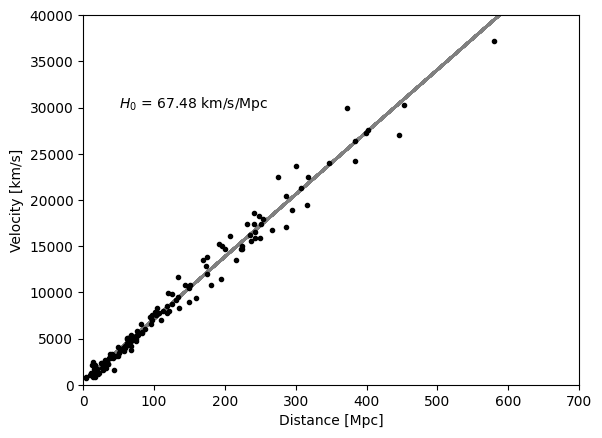

In [9]:
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=2)
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"$H_0$ = {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000)) #listing our slope value on the graph

In [10]:
d= (1 * u.Mpc) #calculating the age of the universe using our slope value for the Hubble Constant
v= (67.48 * u.km / u.s).to(u.Mpc / u.s)
t=(d/v).to(u.Gyr)
print(t)

14.49010405573191 Gyr


In [13]:
# prompt: calculate the reduced chi-squared for the graph x^2/v
#use google Gemini to Calculate the reduced chi squared

residuals = velocity.to(u.km / u.s).value - velocity_model #the observed value minus expected values. We expect for it to follow the model variable, but the first thing is the actual velocity values
variance = np.var(residuals) #finds the variance amoung our data points
chi_squared = np.sum((residuals**2) / variance) #calculating the
dof = len(residuals) - 2  # Degrees of freedom (number of data points - number of fitted parameters) ; our two parameters are velocity and distance
reduced_chi_squared = chi_squared / dof #calculating the reduced chi squared using the values we found

print("Reduced Chi-Squared:", reduced_chi_squared)


Reduced Chi-Squared: 1.2355095026105012
